<a href="https://colab.research.google.com/github/Srijita-31/Spam-Classifier/blob/master/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
##Data loading
import numpy as np
import matplotlib.pyplot as plt
##Mount google drive to load dataset into google colab...
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

###Load STAIRCASE noisy data set from google drive......Required for Noisy Data
df=pd.read_csv('/content/gdrive/MyDrive/ML_Dataset/spam.csv')

Mounted at /content/gdrive/


In [ ]:
##Prepare Note book for plot using seaborn
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Data Viz.
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
# Removed the line causing the error as it's not a valid function call
# Using the font_scale parameter
sb.set(font_scale=1.0)
sb_c = sb.color_palette(palette='deep')

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.facecolor"] = "white"

%load_ext rich
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The rich extension is already loaded. To reload it, use:
  %reload_ext rich
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1343,ham,Crazy ar he's married. like gd looking guys n...,NaN,NaN,NaN
502,ham,Check with nuerologist.,NaN,NaN,NaN
320,ham,"Merry Christmas to you too babe, i love ya *ki...",NaN,NaN,NaN
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",NaN,NaN,NaN
952,ham,Beautiful Truth against Gravity.. Read careful...,NaN,NaN,NaN


In [ ]:
df.shape

(1473, 5)

In [ ]:
# 1. Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          1473 non-null   object
 1   v2          1473 non-null   object
 2   Unnamed: 2  11 non-null     object
 3   Unnamed: 3  4 non-null      object
 4   Unnamed: 4  2 non-null      object
dtypes: object(5)
memory usage: 57.7+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
749,ham,By monday next week. Give me the full gist
1379,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
462,spam,"UpgrdCentre Orange customer, you may now claim..."
1194,ham,Ok... C ya...
114,ham,"Wa, ur openin sentence very formal... Anyway, ..."


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
82,ham,Ok i am on the way to home hi hi
100,ham,Okay name ur price as long as its legal! Wen c...
666,ham,Carlos'll be here in a minute if you still nee...
989,ham,Ugh. Gotta drive back to sd from la. My butt i...
649,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

46

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(1427, 2)

In [ ]:
#EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,1220
1,207


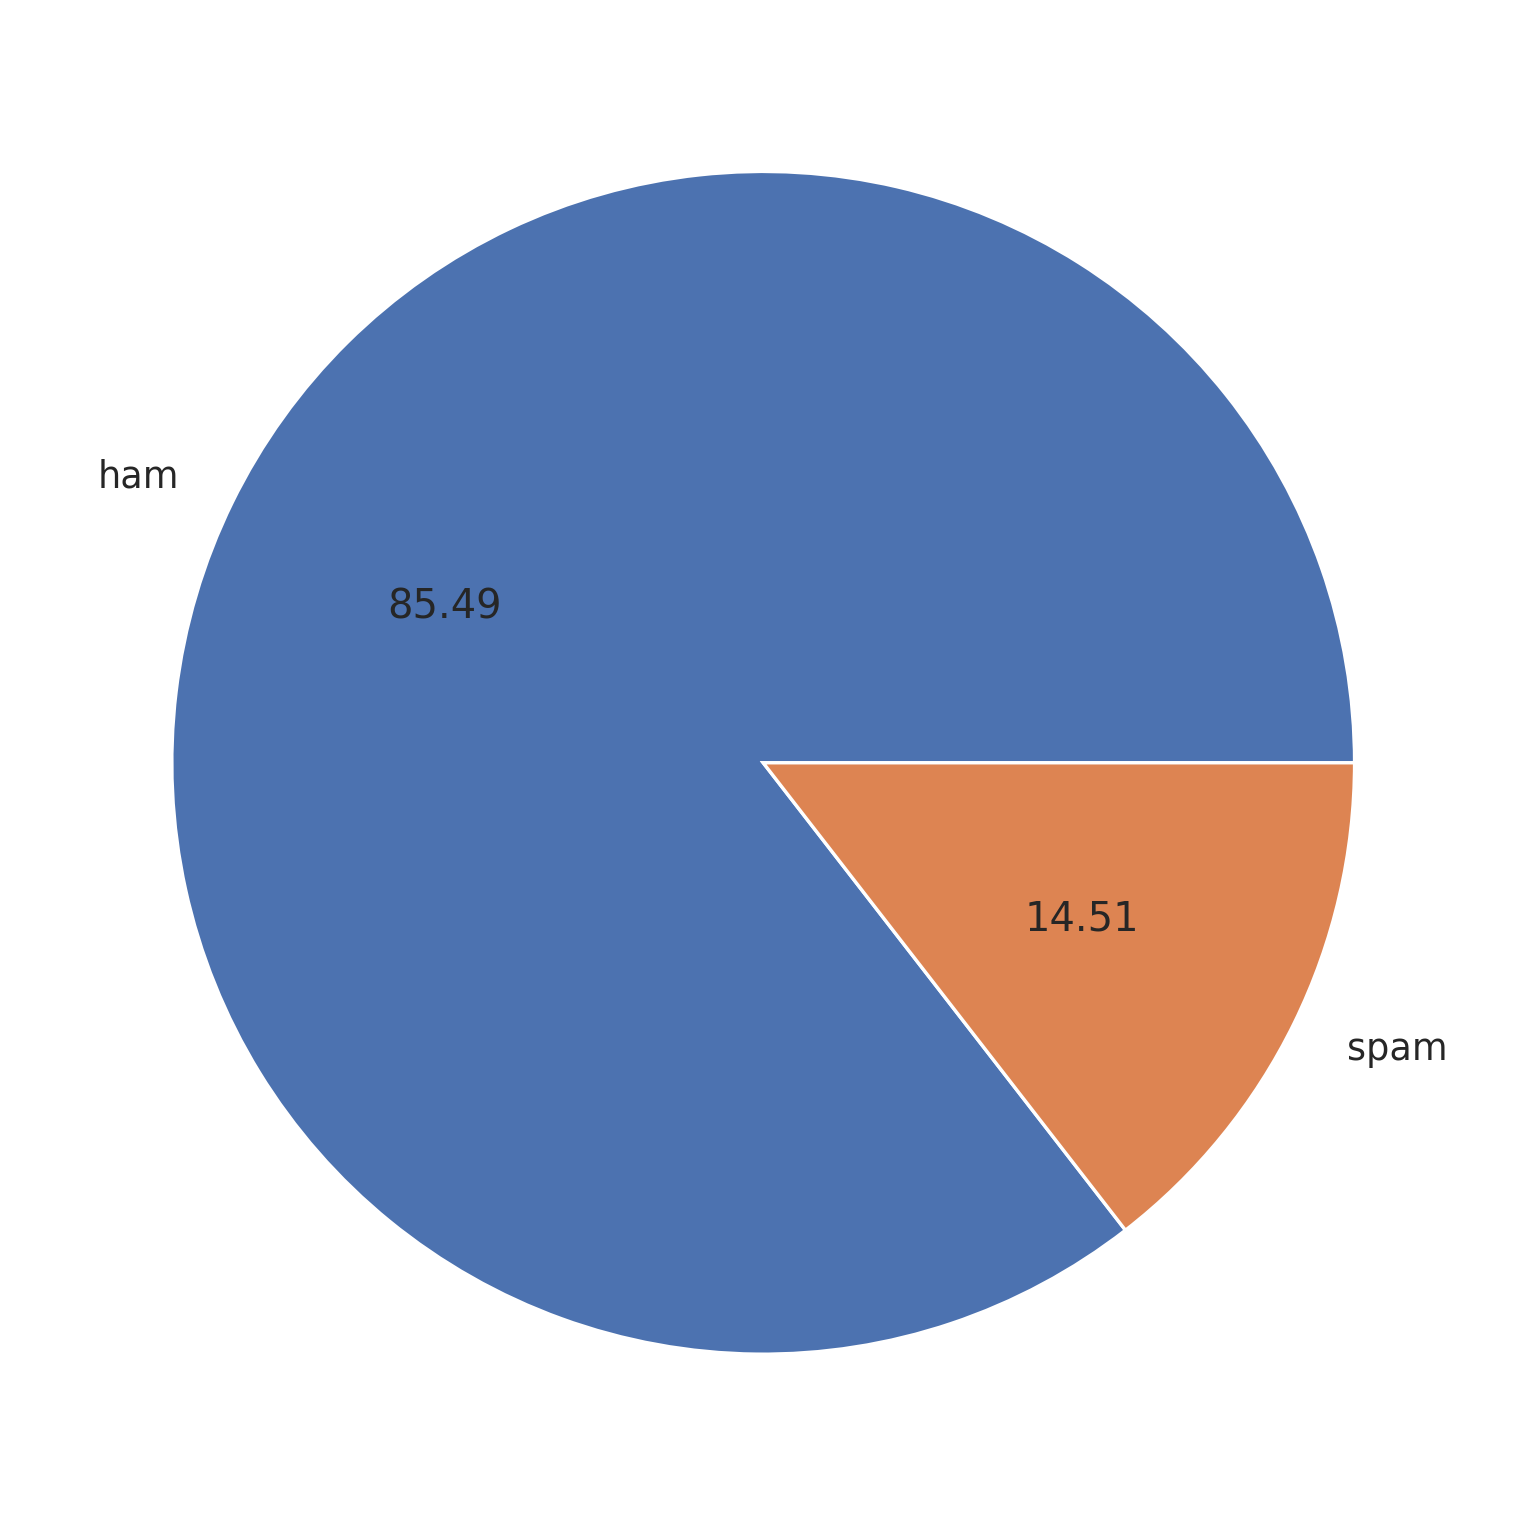

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [ ]:
# Data is imbalanced


In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('word_tokenize()')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading word_tokenize(): Package 'word_tokenize()'
[nltk_data]     not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
import nltk
nltk.download('punkt')
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
nltk.download("stopwords")
nltk.download('word_tokenize')
nltk.download('punkt_tab')
nltk.download('wordnet')
df[['num_characters','num_words','num_sentences']].describe()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,num_characters,num_words,num_sentences
count,1427.000000,1427.000000,1427.000000
mean,81.350385,18.782761,1.991591
std,57.678808,12.512957,1.352339
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,64.000000,16.000000,2.000000
75%,126.000000,28.000000,3.000000
max,910.000000,175.000000,14.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1220.000000,1220.000000,1220.000000
mean,71.879508,17.291803,1.813934
std,56.014583,12.649179,1.214070
min,3.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,95.000000,23.000000,2.000000
max,910.000000,175.000000,14.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,207.000000,207.000000,207.000000
mean,137.169082,27.570048,3.038647
std,28.294488,6.804030,1.627570
min,37.000000,5.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,147.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,175.000000,42.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

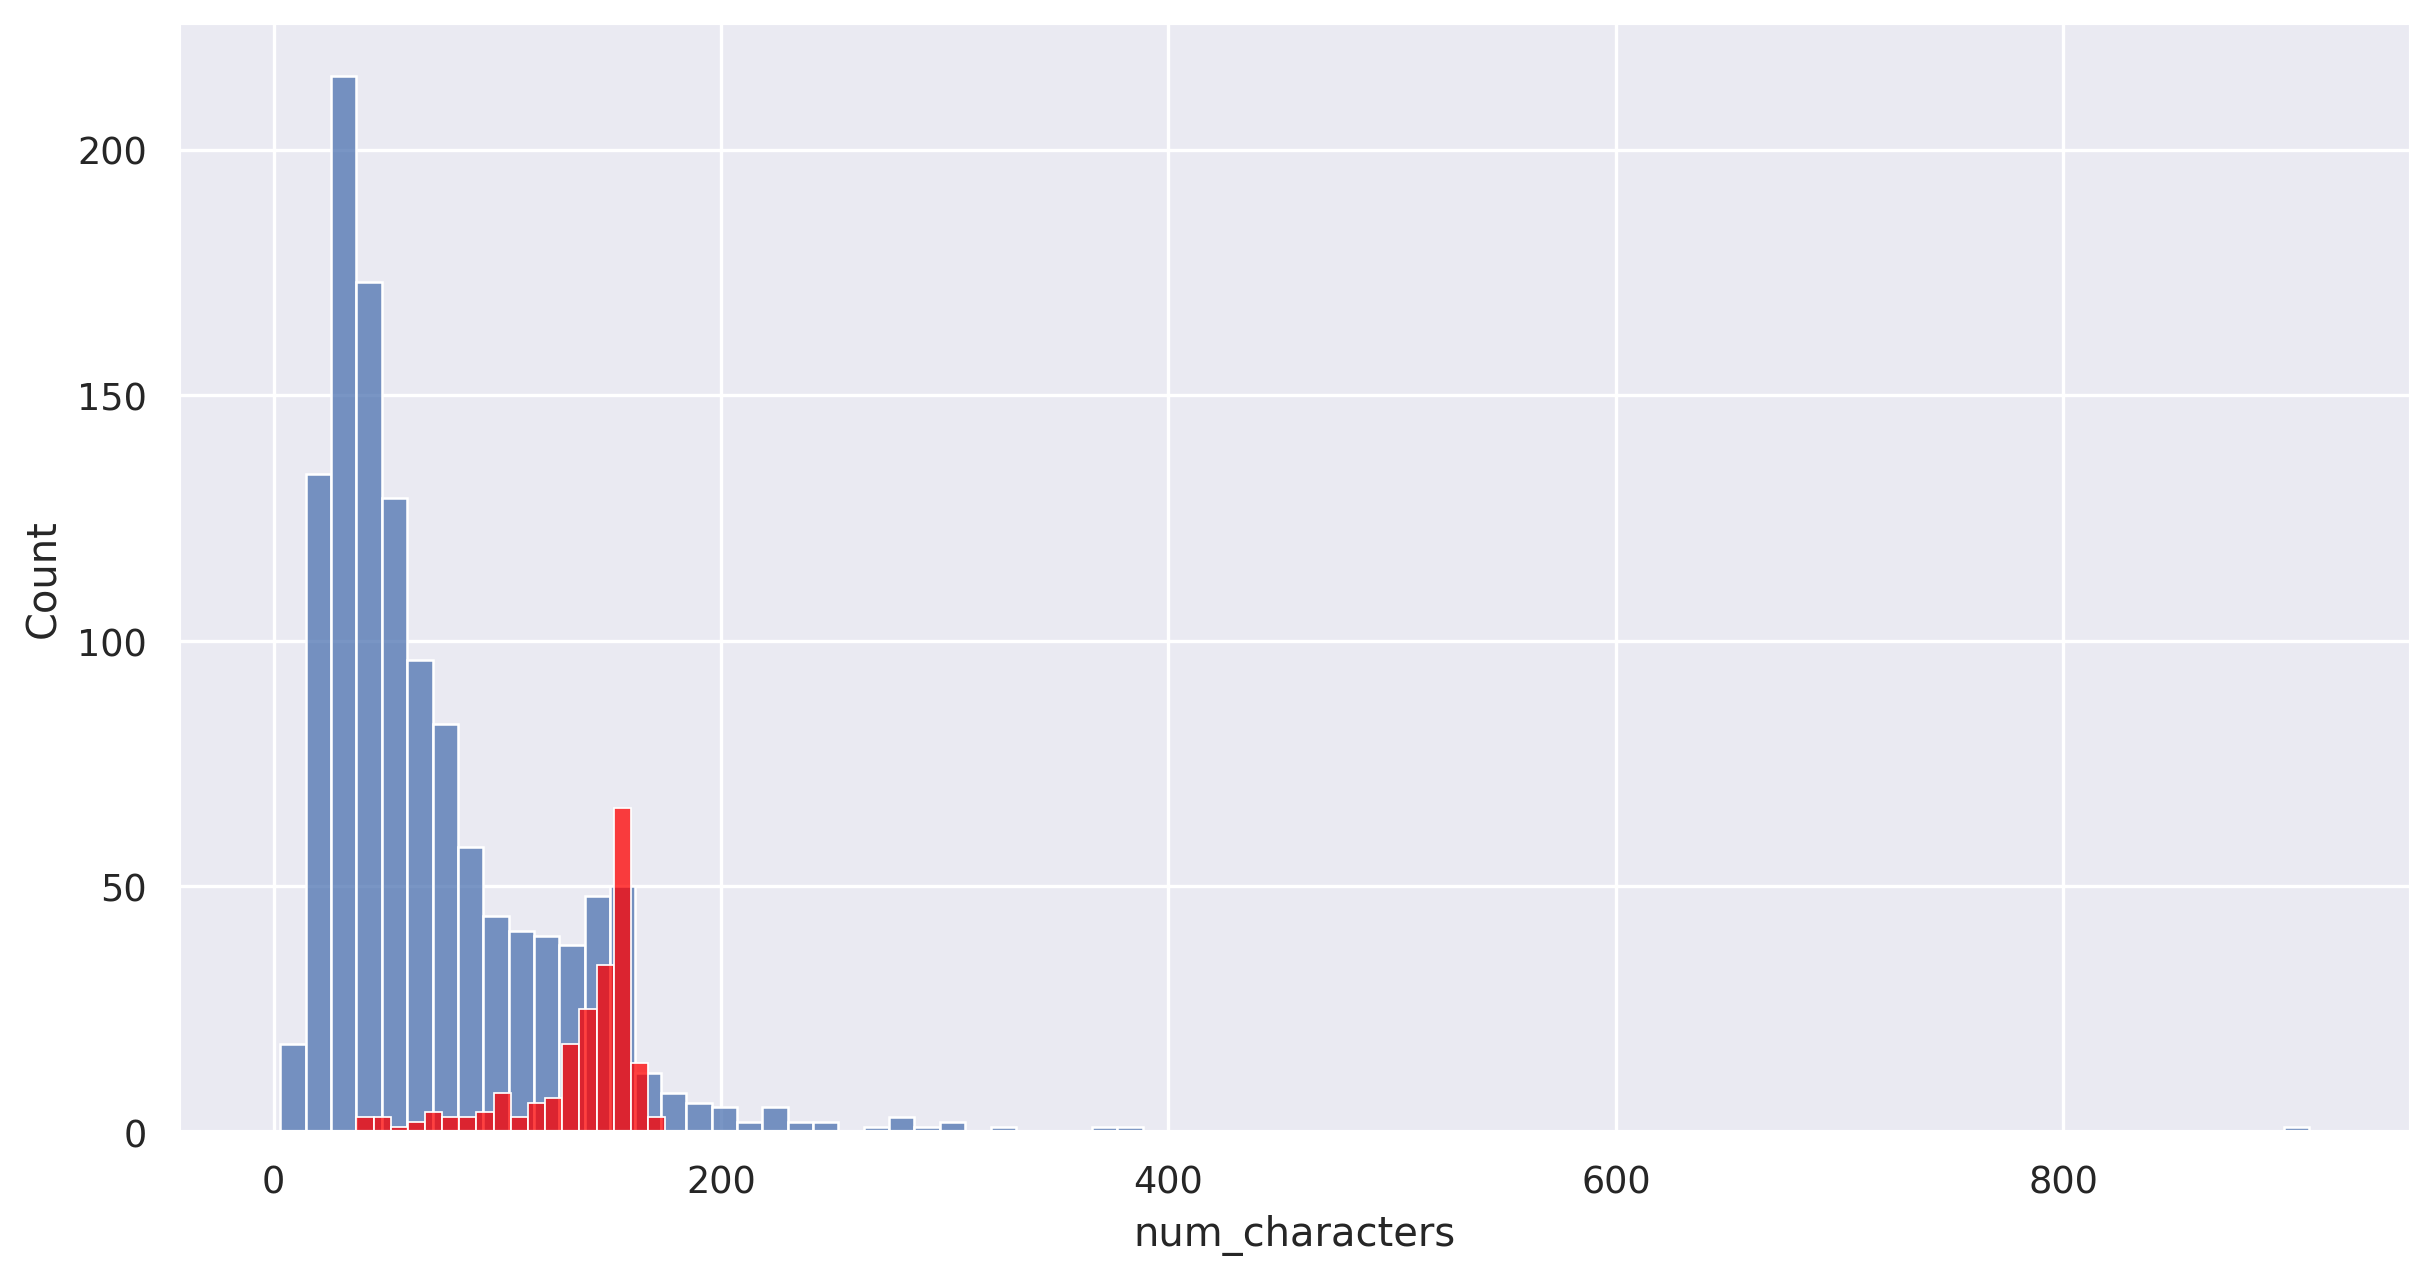

In [ ]:
import seaborn as sb
plt.figure(figsize=(12,6))
sb.histplot(df[df['target'] == 0]['num_characters'])
sb.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

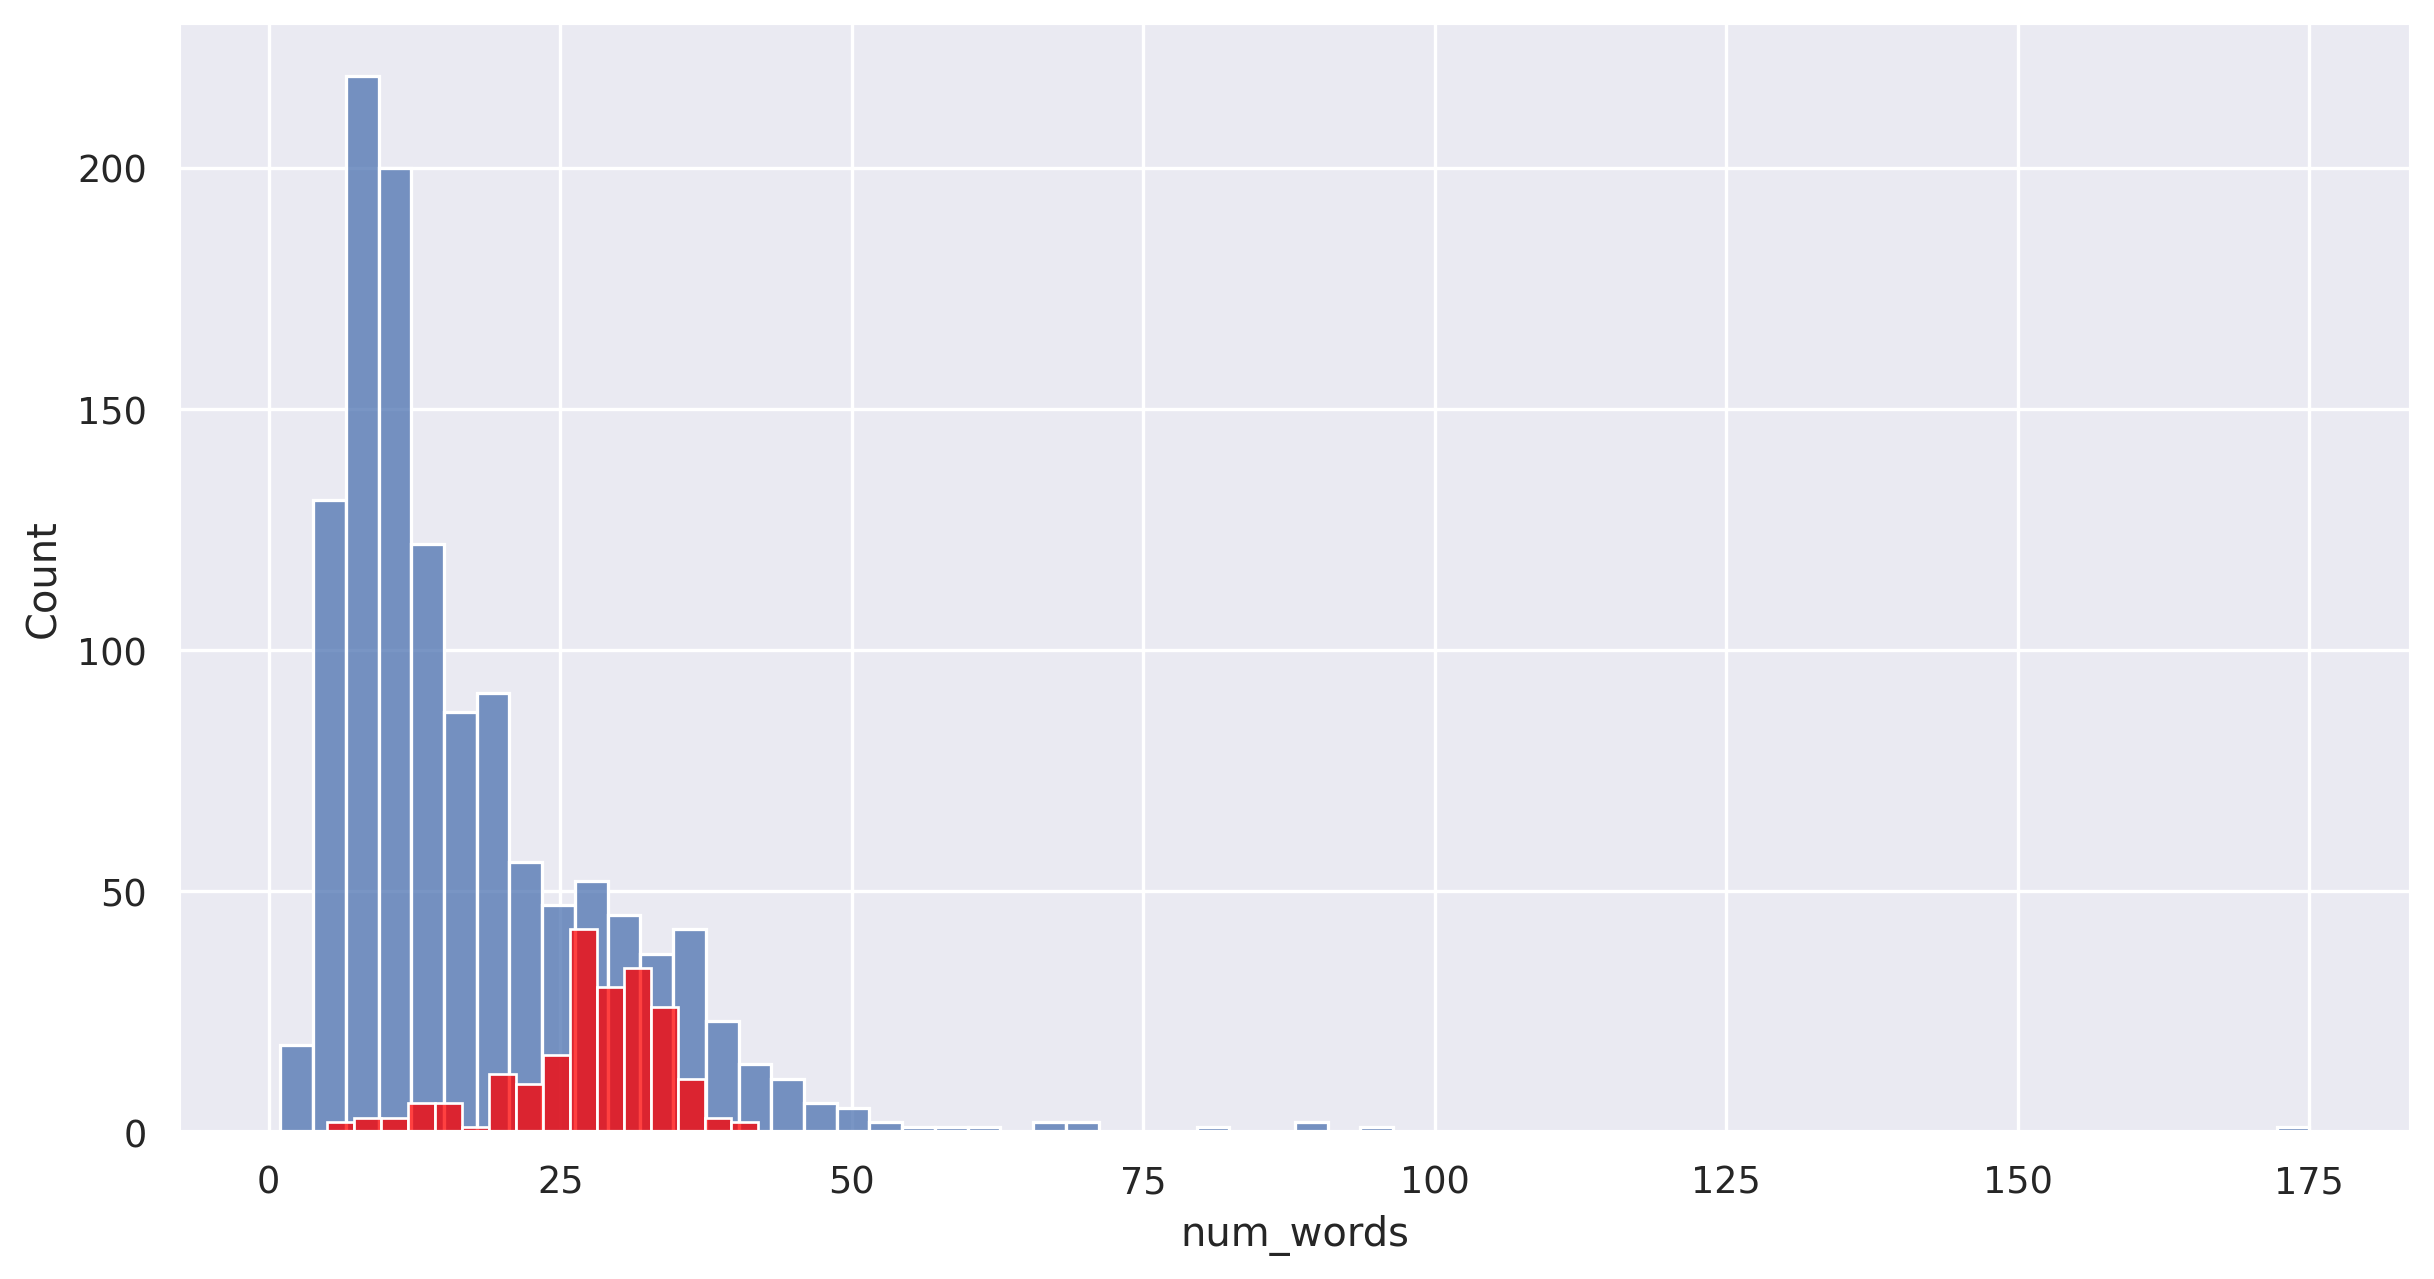

In [ ]:
plt.figure(figsize=(12,6))
sb.histplot(df[df['target'] == 0]['num_words'])
sb.histplot(df[df['target'] == 1]['num_words'],color='red')

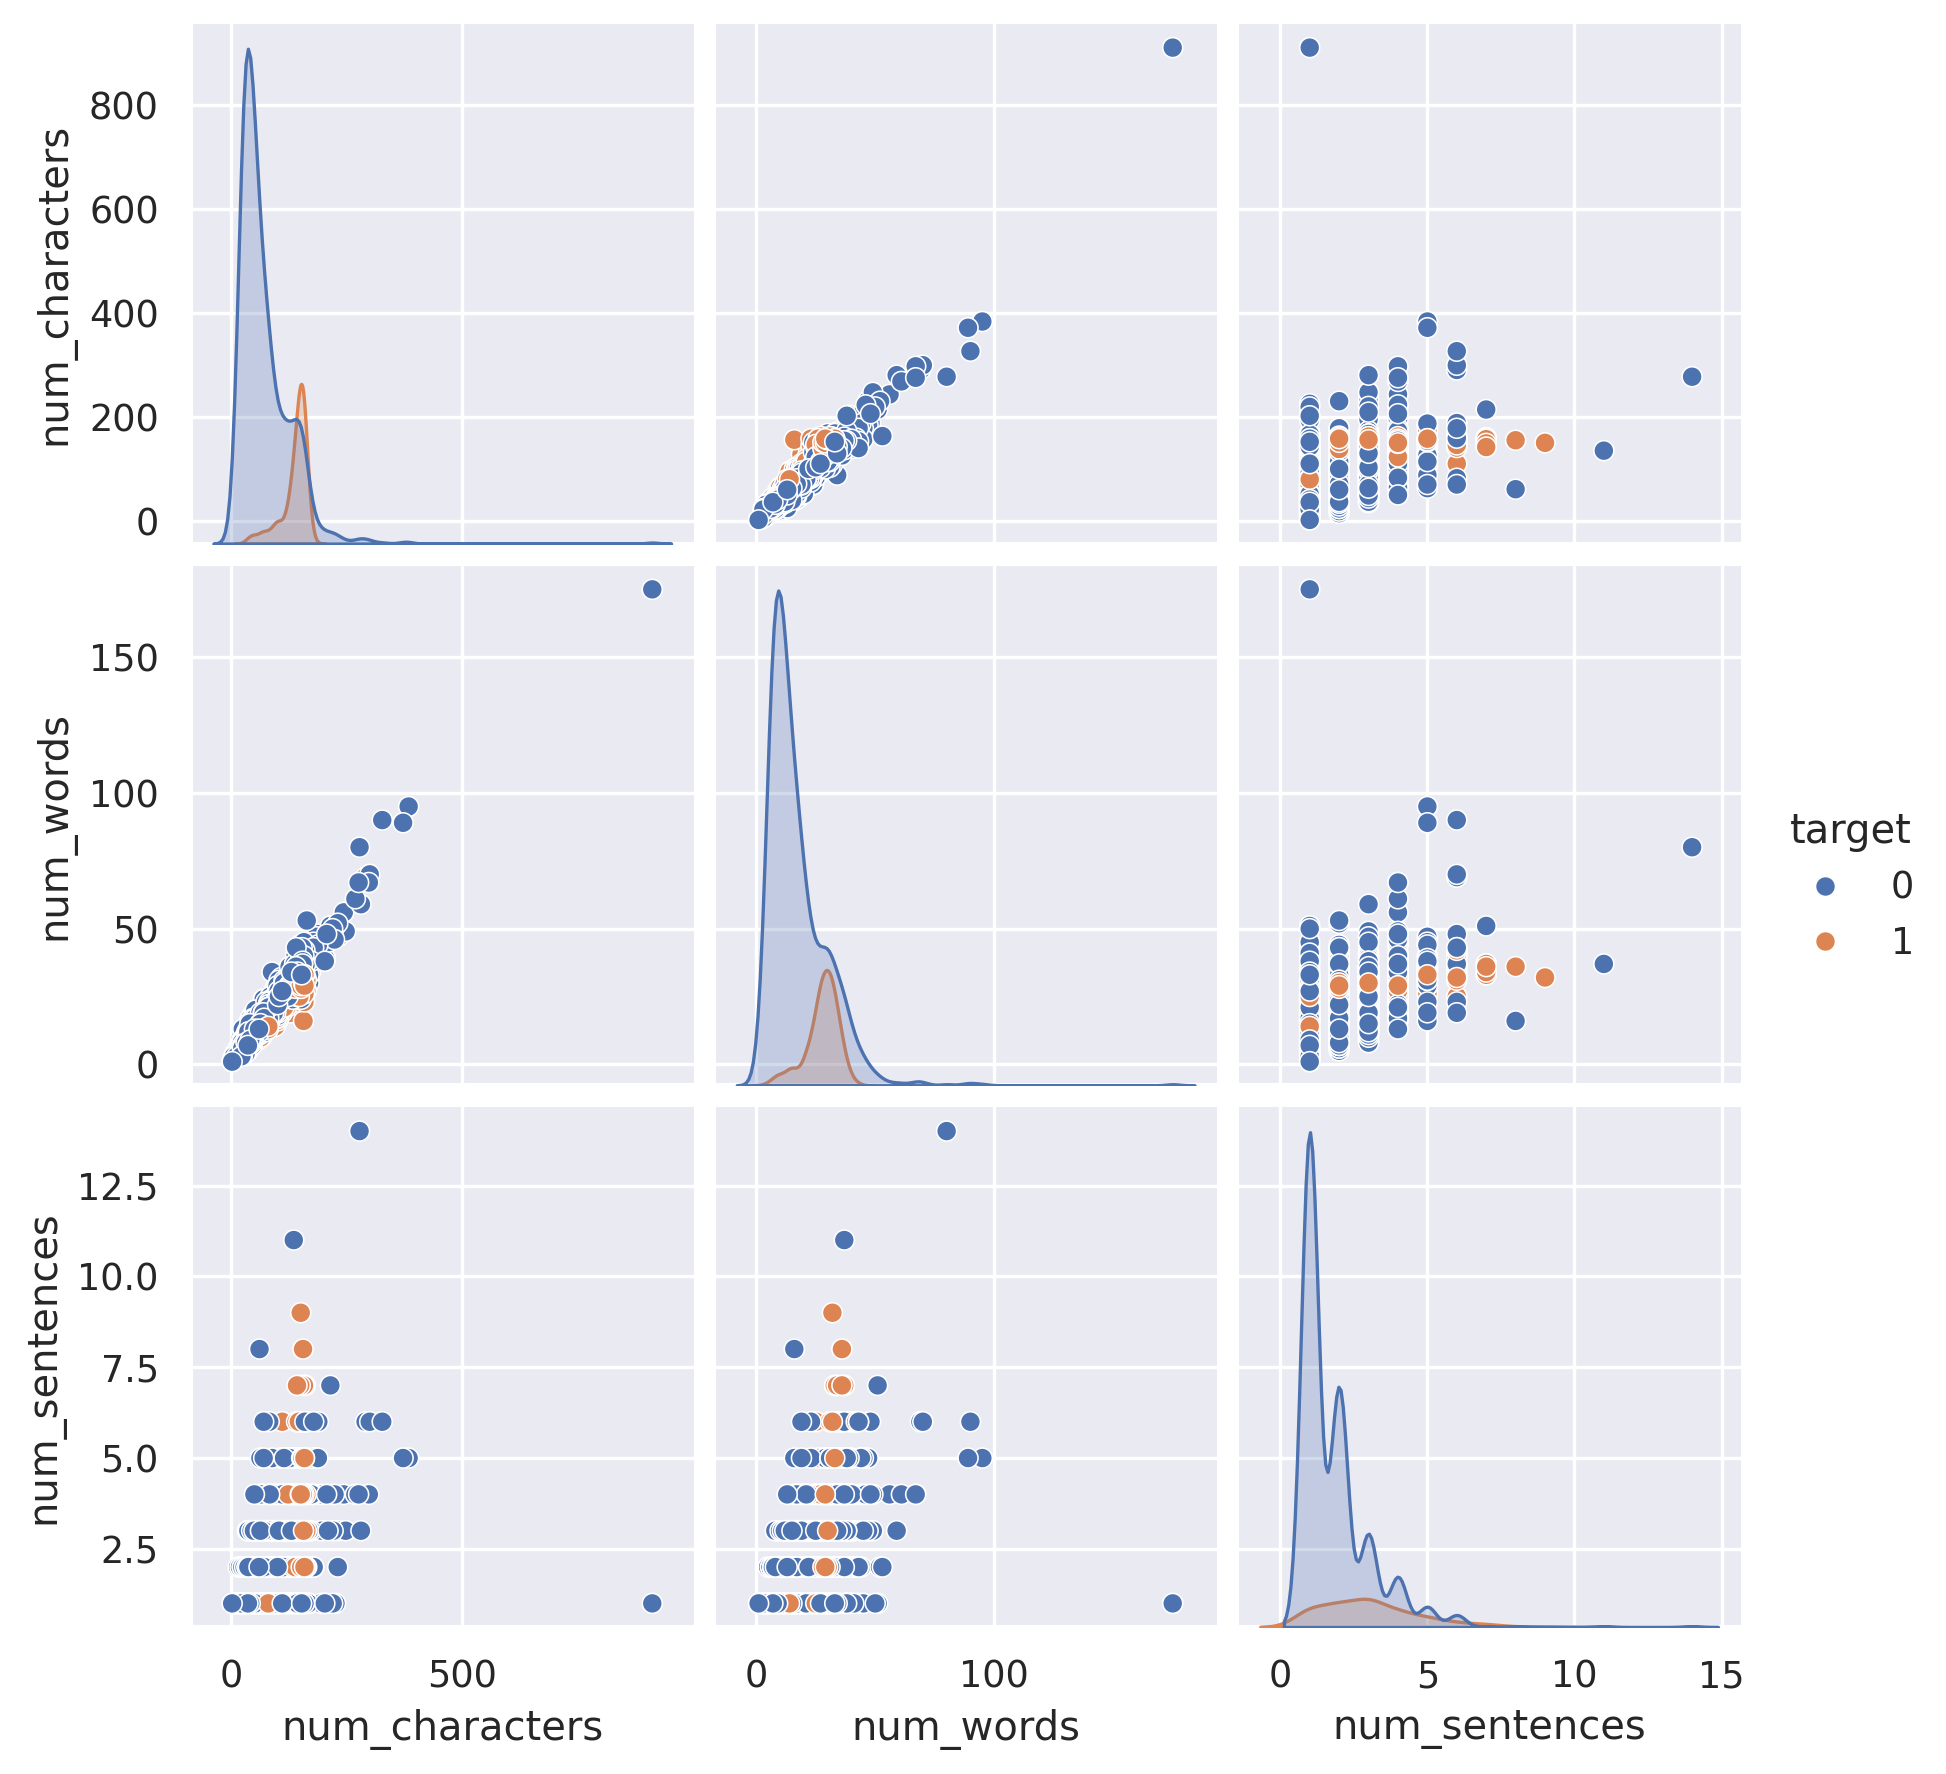

In [ ]:
sb.pairplot(df,hue='target')

<Axes: >

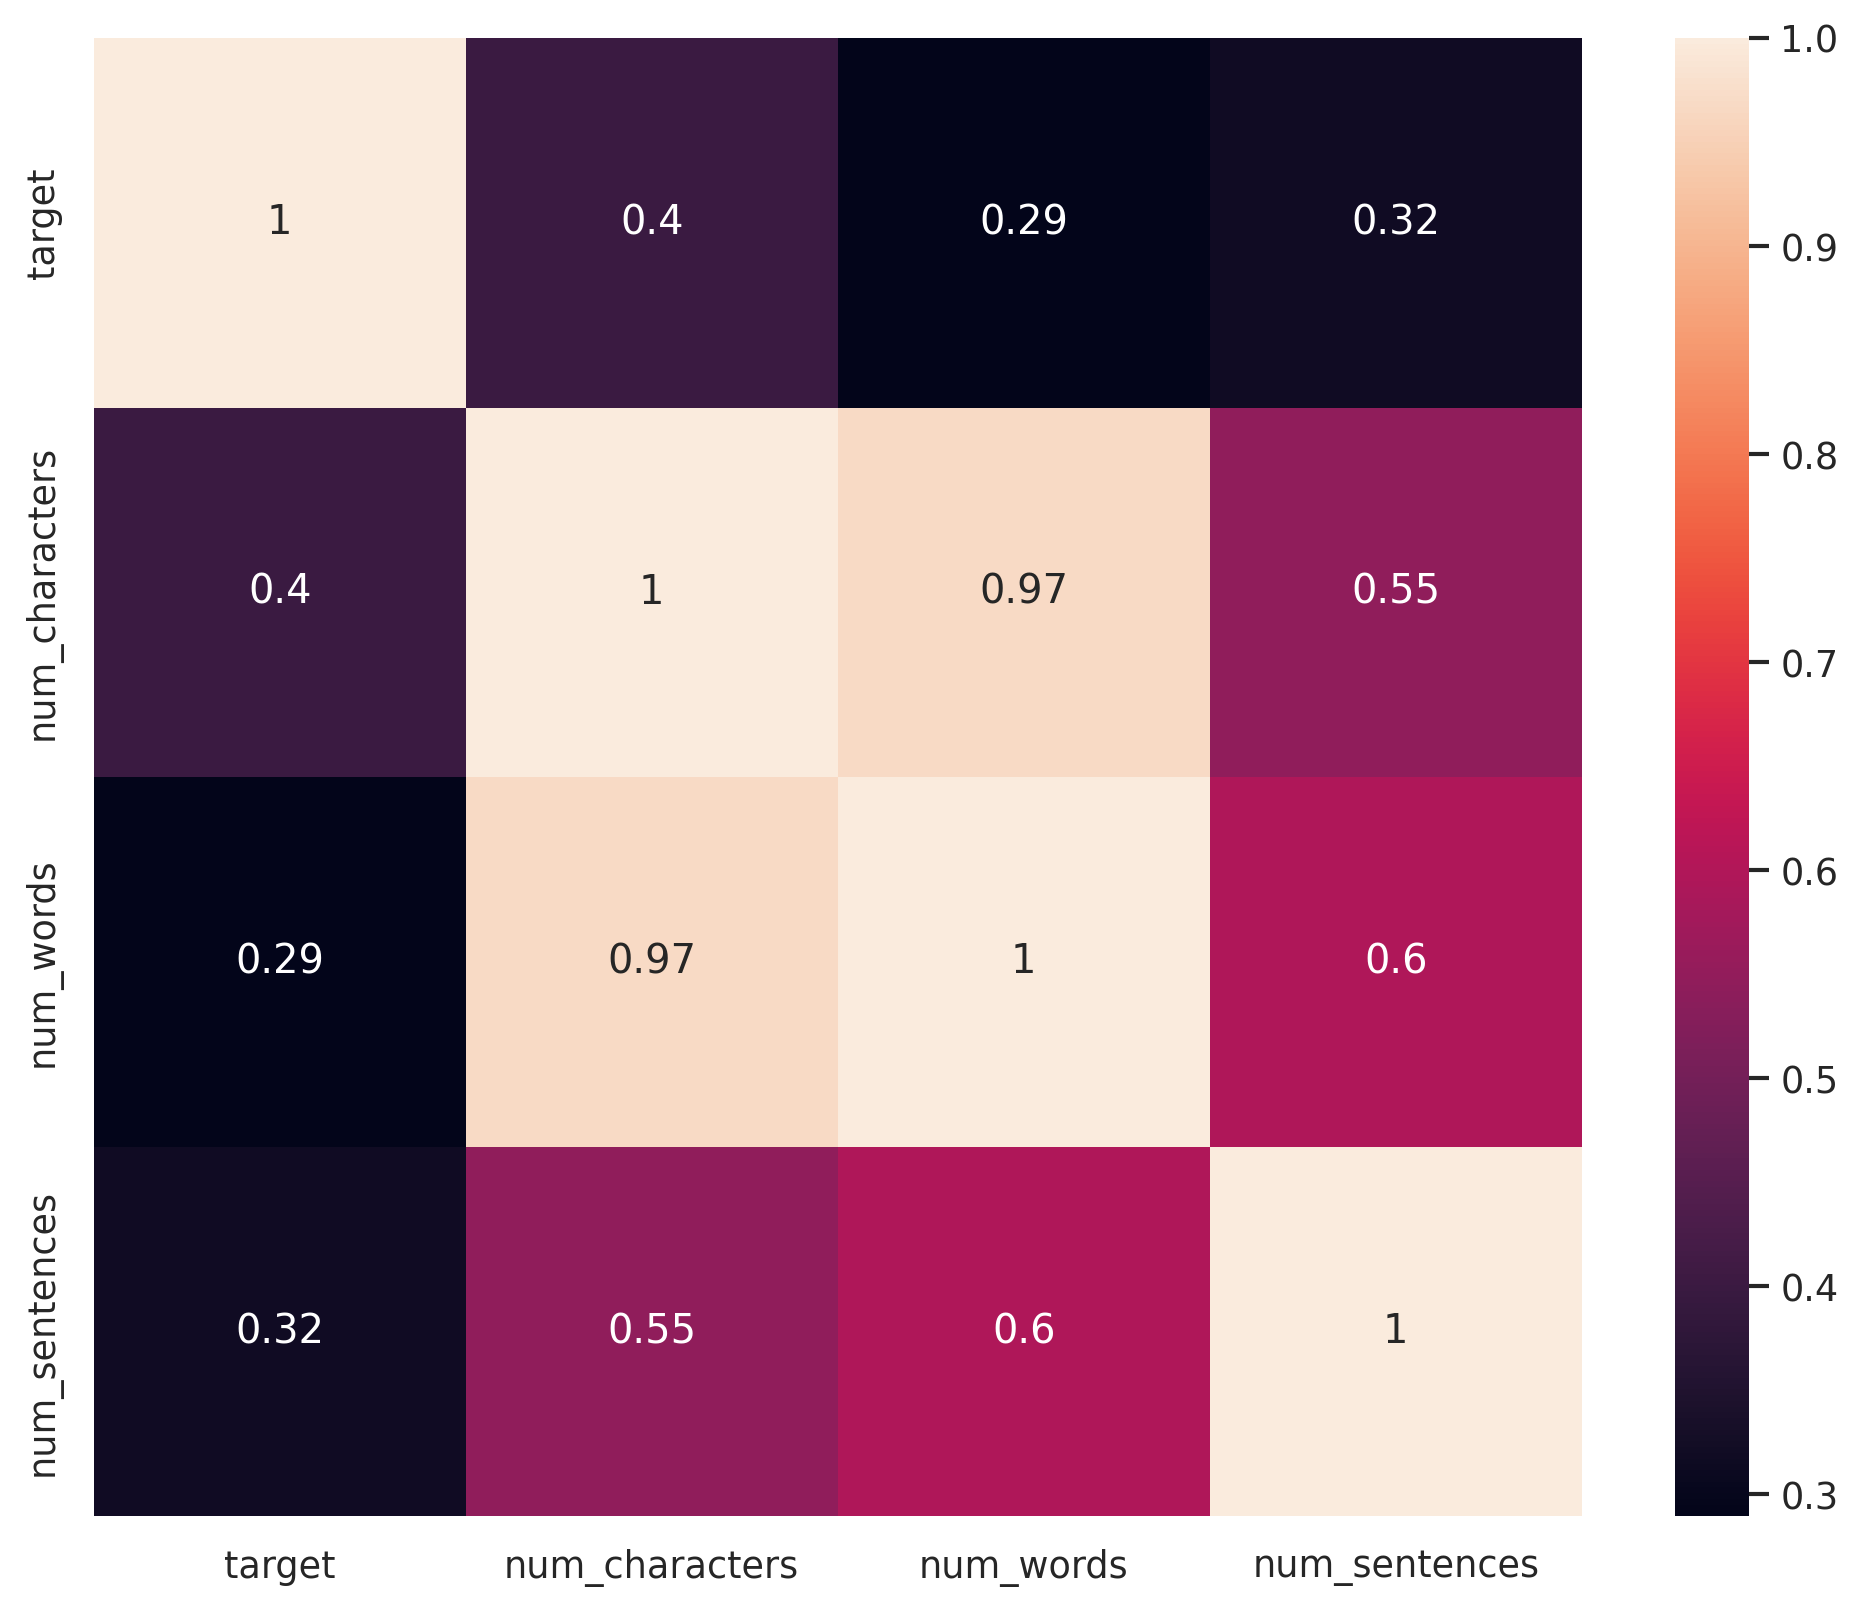

In [ ]:
sb.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

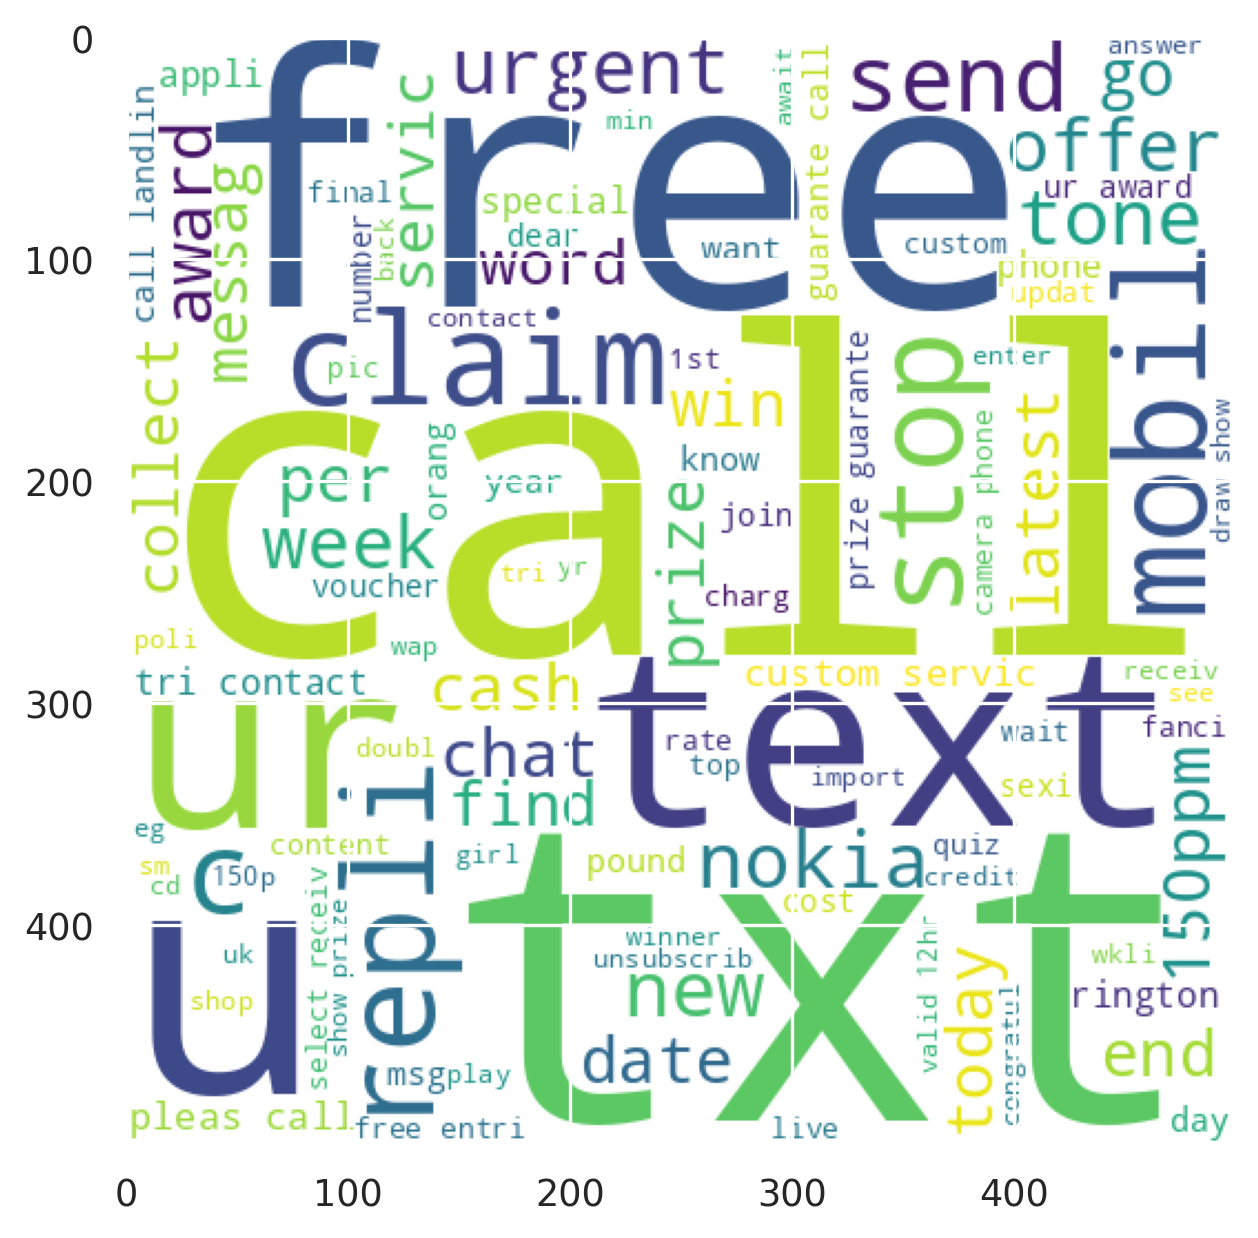

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

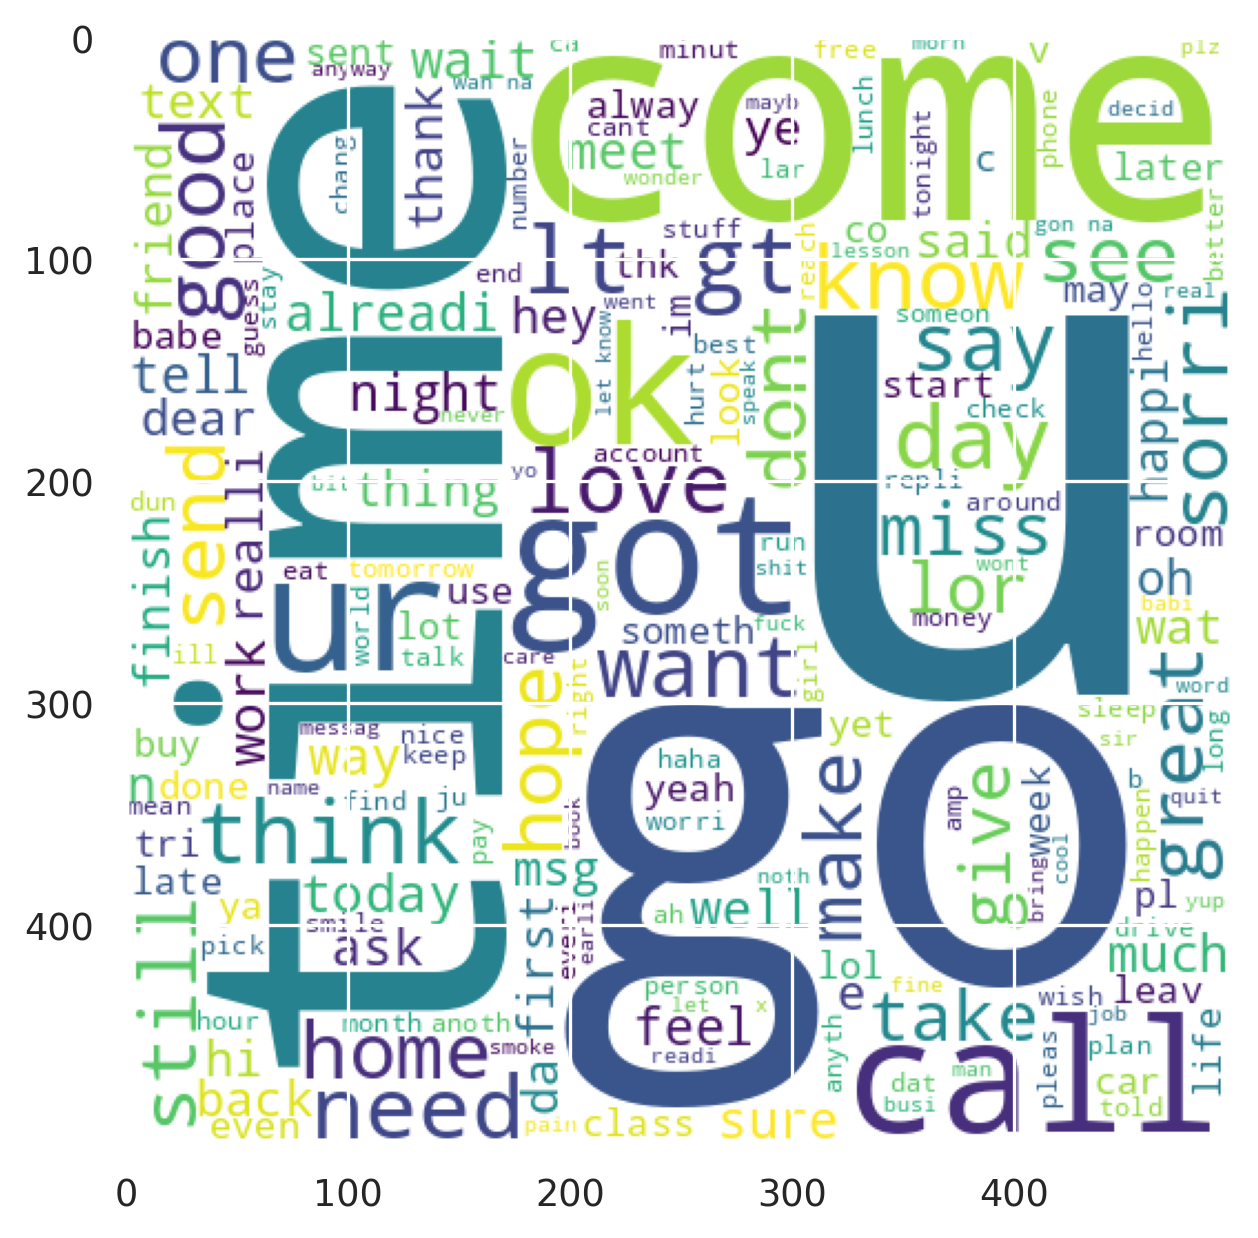

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()



,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
X.shape

(1427, 3000)

In [ ]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9055944055944056
[[226  21]
 [  6  33]]
0.6111111111111112


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9405594405594405
[[247   0]
 [ 17  22]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9545454545454546
[[245   2]
 [ 11  28]]
0.9333333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9755244755244755, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9755244755244755
Precision -  1.0
For  KN
Accuracy -  0.9300699300699301
Precision -  1.0
For  NB
Accuracy -  0.9405594405594405
Precision -  1.0
For  DT
Accuracy -  0.916083916083916
Precision -  0.7142857142857143
For  LR
Accuracy -  0.9230769230769231
Precision -  0.8695652173913043
For  RF
Accuracy -  0.9685314685314685
Precision -  1.0
For  AdaBoost
Accuracy -  0.9335664335664335
Precision -  0.7380952380952381
For  BgC
Accuracy -  0.9335664335664335
Precision -  0.7380952380952381
For  ETC
Accuracy -  0.9825174825174825
Precision -  1.0
For  GBDT
Accuracy -  0.9265734265734266
Precision -  0.7647058823529411
For  xgb
Accuracy -  0.9405594405594405
Precision -  0.8055555555555556


In [ ]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975524,1.000000
1,KN,0.930070,1.000000
2,NB,0.940559,1.000000
5,RF,0.968531,1.000000
8,ETC,0.982517,1.000000
4,LR,0.923077,0.869565
10,xgb,0.940559,0.805556
9,GBDT,0.926573,0.764706
6,AdaBoost,0.933566,0.738095
7,BgC,0.933566,0.738095


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975524
1,KN,Accuracy,0.930070
2,NB,Accuracy,0.940559
3,RF,Accuracy,0.968531
4,ETC,Accuracy,0.982517
5,LR,Accuracy,0.923077
6,xgb,Accuracy,0.940559
7,GBDT,Accuracy,0.926573
8,AdaBoost,Accuracy,0.933566
9,BgC,Accuracy,0.933566


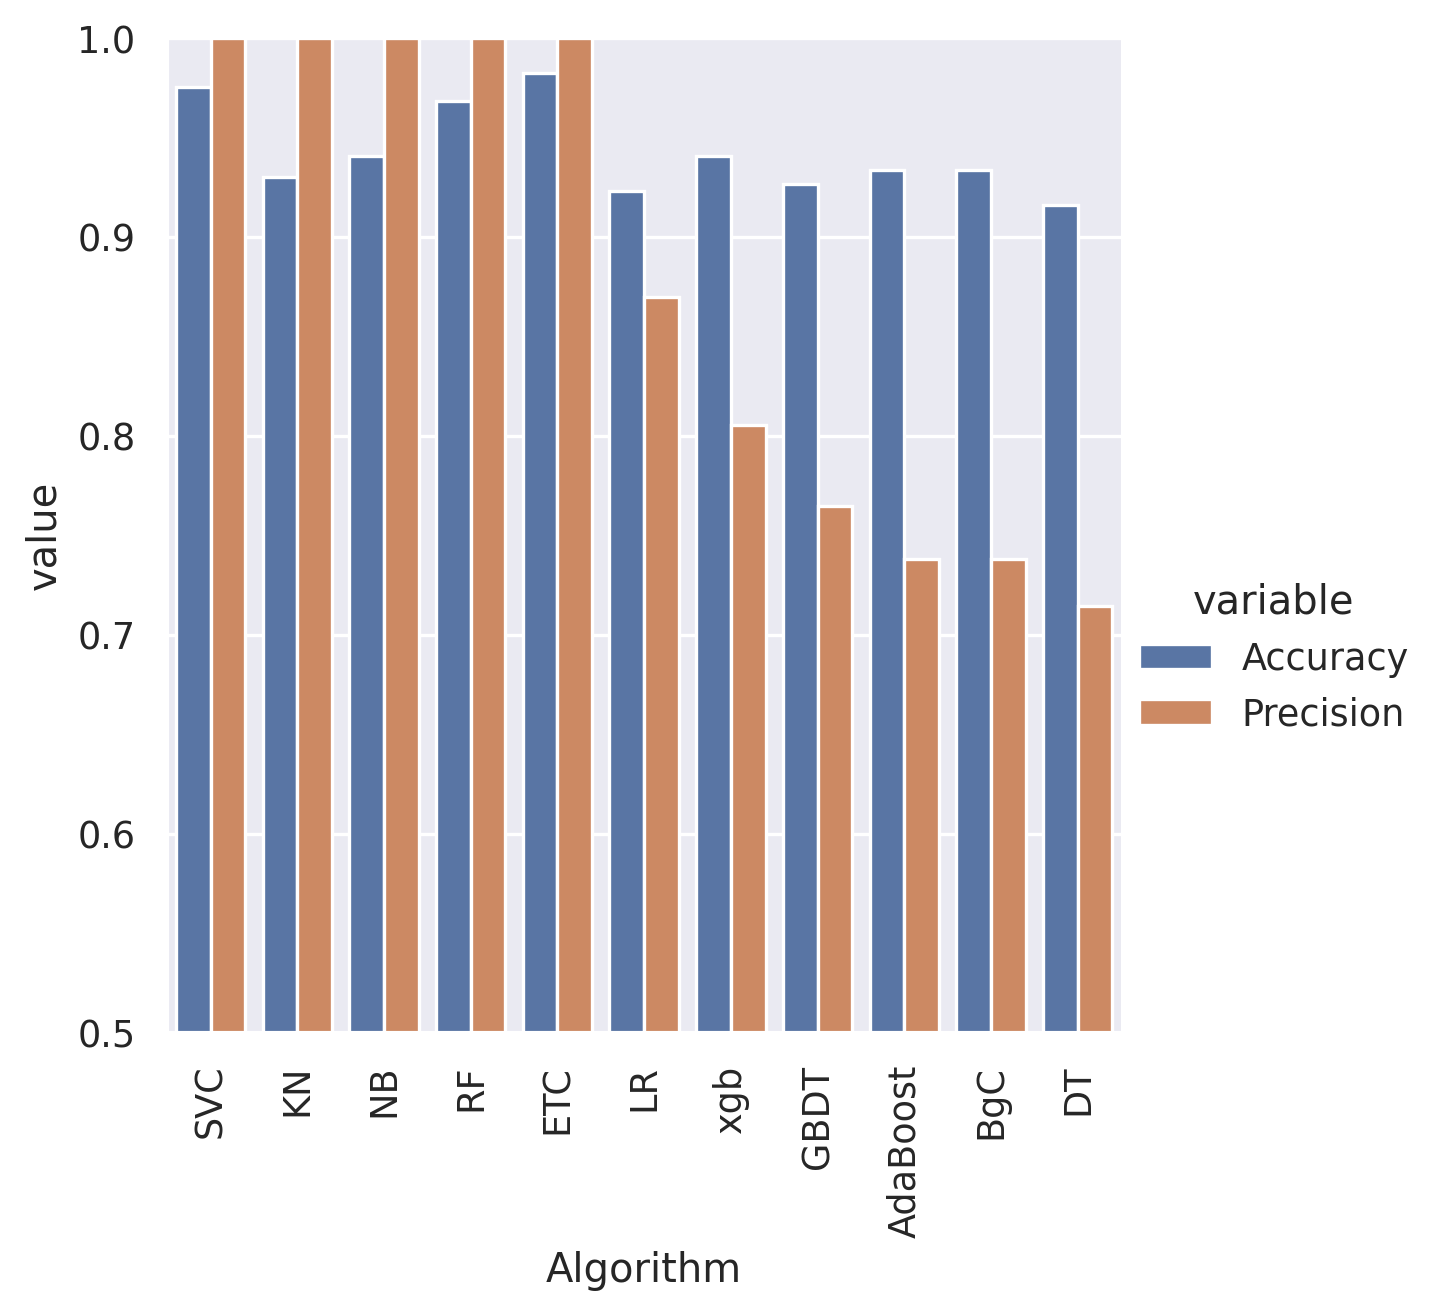

In [ ]:
sb.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975524,1.000000,0.975524,1.000000,0.975524,1.000000,0.975524,1.000000
1,KN,0.930070,1.000000,0.930070,1.000000,0.930070,1.000000,0.930070,1.000000
2,NB,0.940559,1.000000,0.940559,1.000000,0.940559,1.000000,0.940559,1.000000
3,RF,0.968531,1.000000,0.968531,1.000000,0.968531,1.000000,0.968531,1.000000
4,ETC,0.982517,1.000000,0.982517,1.000000,0.982517,1.000000,0.982517,1.000000
5,LR,0.923077,0.869565,0.923077,0.869565,0.923077,0.869565,0.923077,0.869565
6,xgb,0.940559,0.805556,0.940559,0.805556,0.940559,0.805556,0.940559,0.805556
7,GBDT,0.926573,0.764706,0.926573,0.764706,0.926573,0.764706,0.926573,0.764706
8,AdaBoost,0.933566,0.738095,0.933566,0.738095,0.933566,0.738095,0.933566,0.738095
9,BgC,0.933566,0.738095,0.933566,0.738095,0.933566,0.738095,0.933566,0.738095


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.986013986013986
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.972027972027972
Precision 0.8780487804878049


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))